In [1]:
'''
Show the different aspects of different distributions

PDFs
CDFs
E(X)
Var(X)
Other moments

Resources
http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html (very good)
http://docs.scipy.org/doc/scipy/reference/stats.html
'''
import scipy
scipy.__version__
import numpy as np

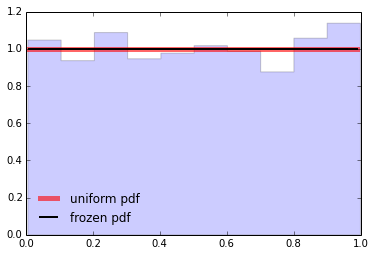

In [2]:
# Uniform distribution
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform
from scipy.stats import uniform
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = uniform.stats(moments='mvsk')
x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
ax.plot(x, uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
#freeze the pdf ?(don't know what that means)
rv = uniform()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
# check accuracy of cdf and ppf
vals = uniform.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], uniform.cdf(vals))
#generate random variable
r = uniform.rvs(size=1000)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

True

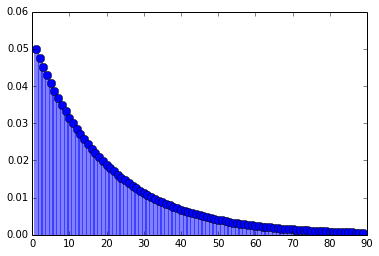

In [3]:
# Geometric 
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom
from scipy.stats import geom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
''' 
The p parameter not only tells you where the p parameter starts at in the y axis 
but also how many points will be plotted
'''
p = .05
mean, var, skew, kurt = geom.stats(p, moments='mvsk')
x = np.arange(geom.ppf(0.01, p), geom.ppf(0.99, p))
ax.plot(x, geom.pmf(x, p), 'bo', ms=8, label='geom pmf')
ax.vlines(x, 0, geom.pmf(x, p), colors='b', lw=5, alpha=0.5)

#check accuracy
prob = geom.cdf(x, p)
np.allclose(x, geom.ppf(prob, p))
#generate random numbers
#r = geom.rvs(p, size=1000)

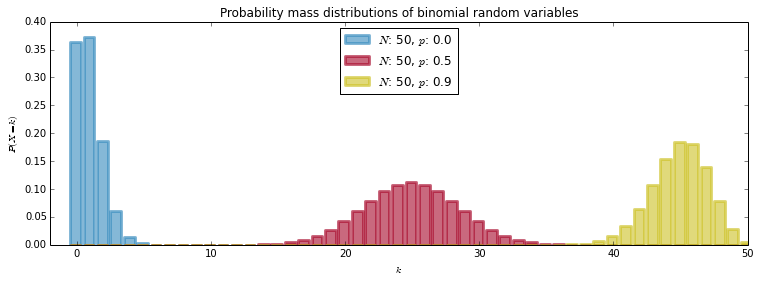

In [5]:
'''
Binomial
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom
Answers: Probability of x of successes in n trials
'''
figsize(12.5, 4)

import scipy.stats as stats
binomial = stats.binom

'''
If you want more Ns to plot
1. update parameters
2. update colors
3. and update the for i in range(0,x)
'''
#parameters = [(100, .9)]
#parameters = [(50, .02),(50, .5)]
parameters = [(50, .02),(50, .5), (50, .9)]
#parameters = [(10, 1)]
colors = ["#348ABD", "#A60628", "#CCC123"]

for i in range(0,len(parameters)):
    N, p = parameters[i]
    _x = np.arange(N + 1)
    #print 'i = {0}, N = {1}, p = {2}, _x = {3}'.format(i,N,p,_x)
    plt.bar(_x - 0.5, binomial.pmf(_x, N, p), color=colors[i],
            edgecolor=colors[i],
            alpha=0.6,
            label="$N$: %d, $p$: %.1f" % (N, p),
            linewidth=3)

plt.legend(loc="upper center")
plt.xlim(-2, N)
plt.xlabel("$k$")
plt.ylabel("$P(X = k)$")
plt.title("Probability mass distributions of binomial random variables");

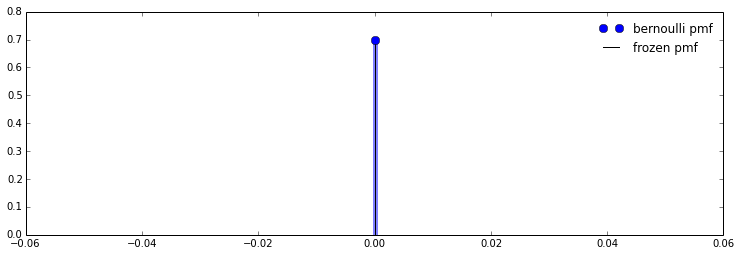

In [5]:
'''
Bernoulli
Answers: 0 or 1. Probability of success in one trial
'''
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

p = 0.3
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
x = np.arange(bernoulli.ppf(0.01, p),bernoulli.ppf(0.99, p))
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
#freeze  the distribution and display the frozen pmf
rv = bernoulli(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

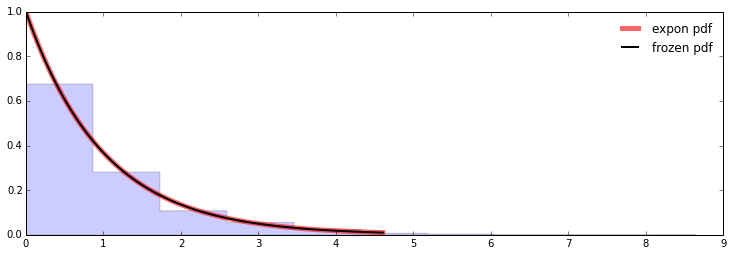

In [6]:
# Exponential
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon
from scipy.stats import expon
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = expon.stats(moments='mvsk')

x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x), 'r-', lw=5, alpha=0.6, label='expon pdf')

#OR, Alternatively, freeze the distribution and display the frozen pdf:
rv = expon()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
# check accuracy of cdf and ppf
vals = expon.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], expon.cdf(vals))
# generate random numbers
r = expon.rvs(size=1000)
#compare
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
# Poisson
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

#The probability mass function for poisson is:
#poisson.pmf(k) = exp(-mu) * mu**k / k!
#for k >= 0.

mu = 1
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

#Alternatively, freeze the distribution and display the frozen pmf:
rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

#check accuracy of cdf and ppf
prob = poisson.cdf(x, mu)
np.allclose(x, poisson.ppf(prob, mu))

#generate random numbers
r = poisson.rvs(mu, size=1000)


In [12]:
# Important
# 1. Relationship between Exponential (time between incidents) and Poisson (# incidents in given interval)
# 2. Relationship between Binomial and Poisson

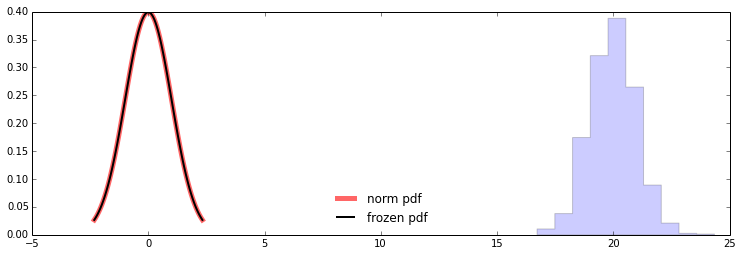

In [13]:
# Normal / Gaussian 
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
#Alternatively, freeze the distribution and display the frozen pmf:
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
#check accuracy of cdf and ppf
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
#generate random numbers
r = norm.rvs(mu, size=1000)
#compare histograms
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
#gamma, beta, cauchy, (less important Raleigh, Maxwell, Pareto)